#MNIST LeNet-5 CNN With Keras

## Load Libraries and Mount Google Drive Data

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

from google.colab import drive
drive.mount('/content/gdrive')


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Load Data

In [0]:
df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset/train.csv')
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

In [0]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Y_train.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [0]:
# Normalize inputs
X_train = X_train / 255.0

##Plot Digits

In [0]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

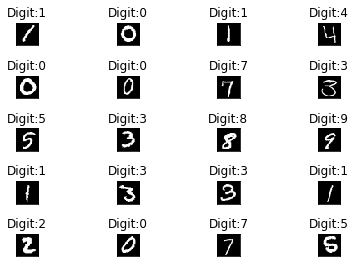

In [0]:
plot_digits(X_train, Y_train)


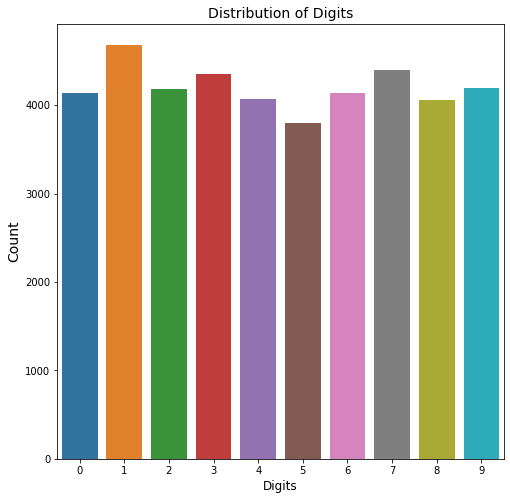

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(Y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [0]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
T_dev = pd.get_dummies(Y_dev).values
T_val = pd.get_dummies(Y_val).values

In [0]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

## CNN Architecture (LeNet-5)

Kita akan menggunakan Arsitekture LeNet-5 untuk membuat Model.

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [0]:
adam = Adam(lr=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [0]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [0]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

### Parameters : Epochs 50

In [0]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=50, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





408/407 [==============================] - 12s 30ms/step - loss: 0.4707 - acc: 0.8527 - val_loss: 0.1074 - val_acc: 0.9683
Epoch 2/50
408/407 [==============================] - 10s 24ms/step - loss: 0.1467 - acc: 0.9551 - val_loss: 0.0681 - val_acc: 0.9786
Epoch 3/50
408/407 [==============================] - 11s 27ms/step - loss: 0.1053 - acc: 0.9675 - val_loss: 0.0625 - val_acc: 0.9778
Epoch 4/50
408/407 [==============================] - 10s 25ms/step - loss: 0.0814 - acc: 0.9750 - val_loss: 0.0451 - val_acc: 0.9881
Epoch 5/50
408/407 [==============================] - 11s 26ms/step - loss: 0.0679 - acc: 0.9794 - val_loss: 0.0389 - val_acc: 0.9865
Epoch 6/50
408/407 [==============================] - 11s 26ms/step - loss: 0.0587 - acc: 0.9820 - val_loss: 0.0409 - val_acc: 0.9889
Epoch 7/50
408/407 [==============================] - 11s 26ms/step - loss: 0.0549 - acc: 0.98

In [0]:
score = model.evaluate(X_val, T_val, batch_size=32)

1260/1260 [==============================] - 0s 88us/step


In [0]:
score

[0.017105051358036385, 0.9960317462209671]

#### Prediksi Data Test (Epoch 50)

In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/LeNet/test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [0]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [0]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3])

#### Membuat Hasil Predisksi (Epoch 50)

In [0]:
df_out = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/LeNet/sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [0]:
df_out.to_csv('out 50 epoch.csv', index=False)

### Parameters : Epochs 100

In [0]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=100), steps_per_epoch=len(X_dev)/100, 
                    epochs=100, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





408/407 [==============================] - 26s 63ms/step - loss: 0.4731 - acc: 0.8517 - val_loss: 0.1011 - val_acc: 0.9722
Epoch 2/100
408/407 [==============================] - 10s 25ms/step - loss: 0.1419 - acc: 0.9573 - val_loss: 0.0833 - val_acc: 0.9746
Epoch 3/100
408/407 [==============================] - 10s 24ms/step - loss: 0.1037 - acc: 0.9681 - val_loss: 0.0585 - val_acc: 0.9817
Epoch 4/100
408/407 [==============================] - 10s 25ms/step - loss: 0.0802 - acc: 0.9755 - val_loss: 0.0497 - val_acc: 0.9881
Epoch 5/100
408/407 [==============================] - 10s 24ms/step - loss: 0.0697 - acc: 0.9782 - val_loss: 0.0535 - val_acc: 0.9841
Epoch 6/100
408/407 [==============================] - 10s 25ms/step - loss: 0.0590 - acc: 0.9820 - val_loss: 0.0480 - val_acc: 0.9865
Epoch 7/100
408/407 [==============================] - 10s 24ms/step - loss: 0.0575 - ac

In [0]:
score = model.evaluate(X_val, T_val, batch_size=32)

1260/1260 [==============================] - 0s 110us/step


In [0]:
score

[0.020082404397221074, 0.9968253970146179]

#### Prediksi Data (Epoch 100)

In [0]:
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset/test.csv')
X_test = np.array(df_test)
X_test = X_test/255.0

In [0]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = model.predict(X_test)

In [0]:
Y_test = np.argmax(Y_test, axis=1)
Y_test[:5]

array([2, 0, 9, 0, 3])

#### Membuat Hasil Predisksi (Epoch 100)

In [0]:
df_out = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset/sample_submission.csv')
df_out['Label'] = Y_test
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [0]:
df_out.to_csv('LeNet output Epoch 100.csv', index=False)